In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import copy
import time
import tabulate
import numpy as np
sys.path.append(os.path.join(os.path.abspath(""), ".."))

In [3]:
from app.models import Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from app.model_features import grid_interruption, get_samples
from app.imager import ImageLoader, DefectViewer, Show, Exposure

In [5]:
img = ImageLoader()

In [4]:
# Seed used in show to show the same images when num_images option is set
seed = 1234
scores = []
legends = []

In [5]:
# Analyzing which defect 
num_samples = 2000
defect_classes = ['FrontGridInterruption', 'NearSolderPad']

In [6]:
defect, not_defect = get_samples(defect_classes, num_samples, complimentary=True)

In [7]:
print(len(defect))
print(len(not_defect))

2000
4000


In [8]:
# Convert the data to the required format for grid interruption
defect_ = grid_interruption(defect, num_jobs=20)
not_defect_ = grid_interruption(not_defect, num_jobs=20)

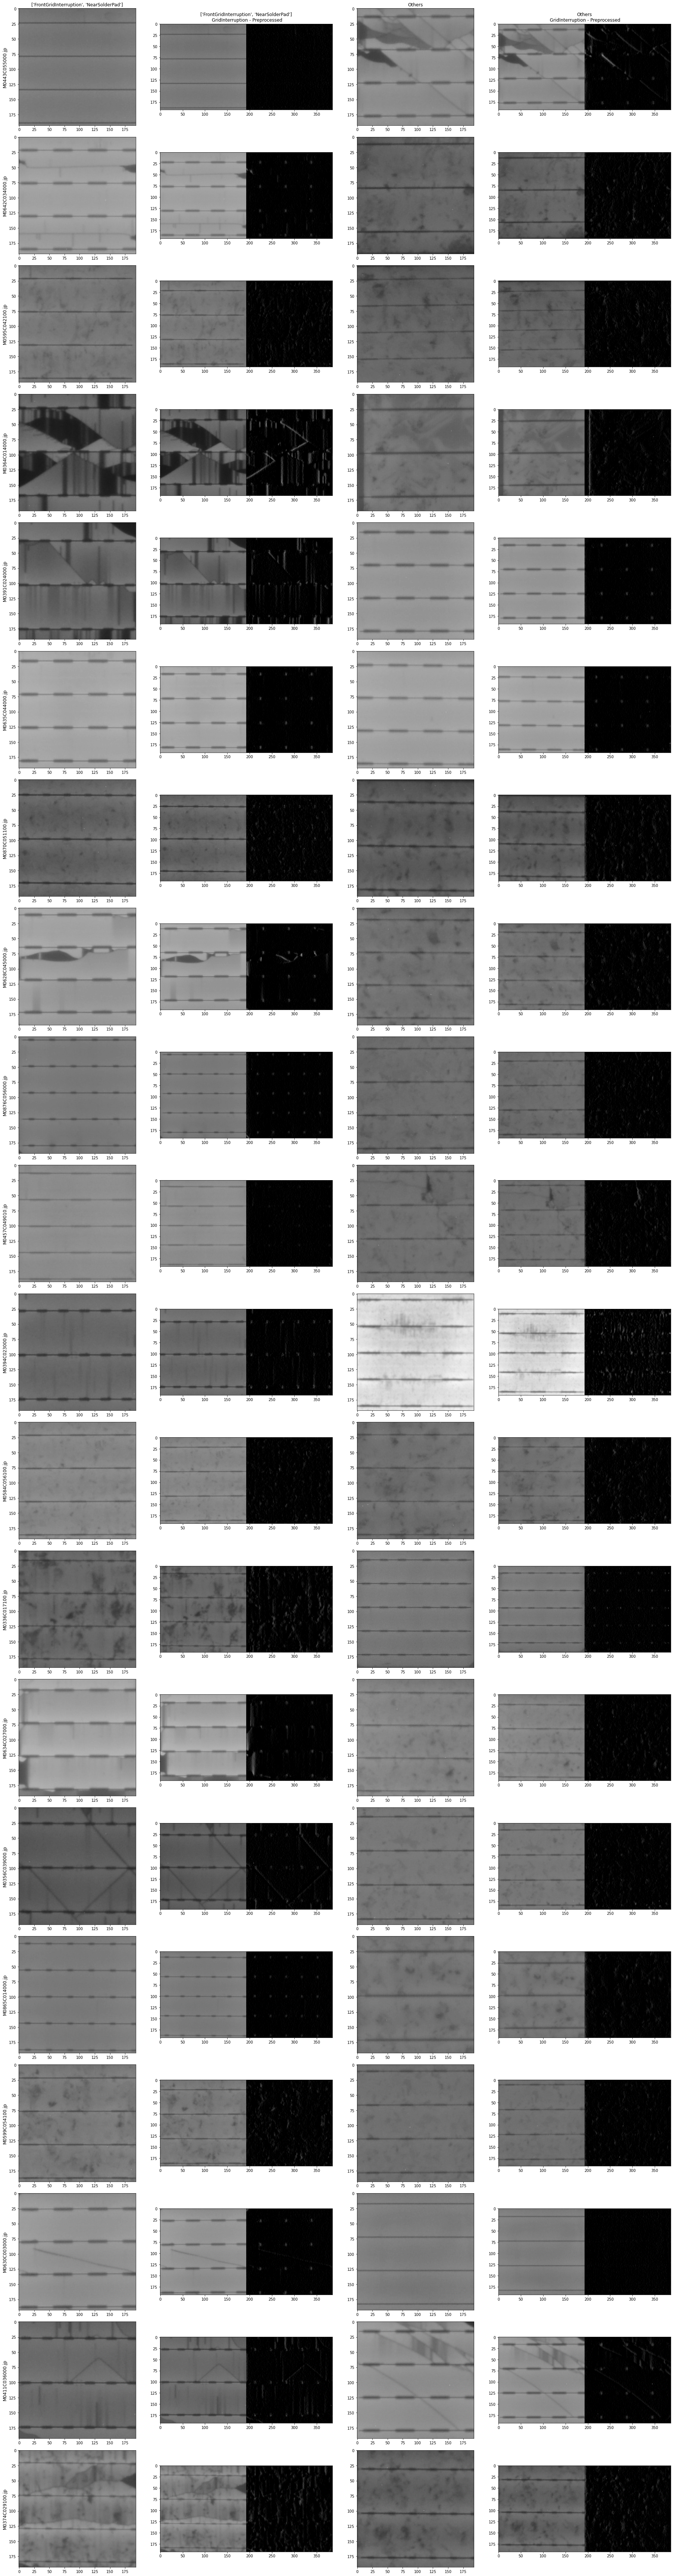

In [9]:
_ = Show(num_images=20, seed=seed) << (defect, defect_) + (not_defect, not_defect_)

In [10]:
# Train a Gradient boosted classifier
pca_dims = min(100, num_samples)
params = {'seed': 14376,'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.05, 'pca_dims': pca_dims}
cla = Classifier(defect_, not_defect_, GradientBoostingClassifier, None)
     
# When done, return the score 
score = cla.fit_cv(**params)
print(score)

# Misclassified
conf, out = cla.misclassified()
print(tabulate.tabulate([['True 0', conf[0, 0], conf[0, 1]], ['True 1', conf[1, 0], conf[1, 1]]], headers=['', 'Pred 0', 'Pred 1']))

scores.append(score)
legends.append('GBC model with 250 dimensions and Sobel images')

0.673733604703754
          Pred 0    Pred 1
------  --------  --------
True 0       724        80
True 1       219       177


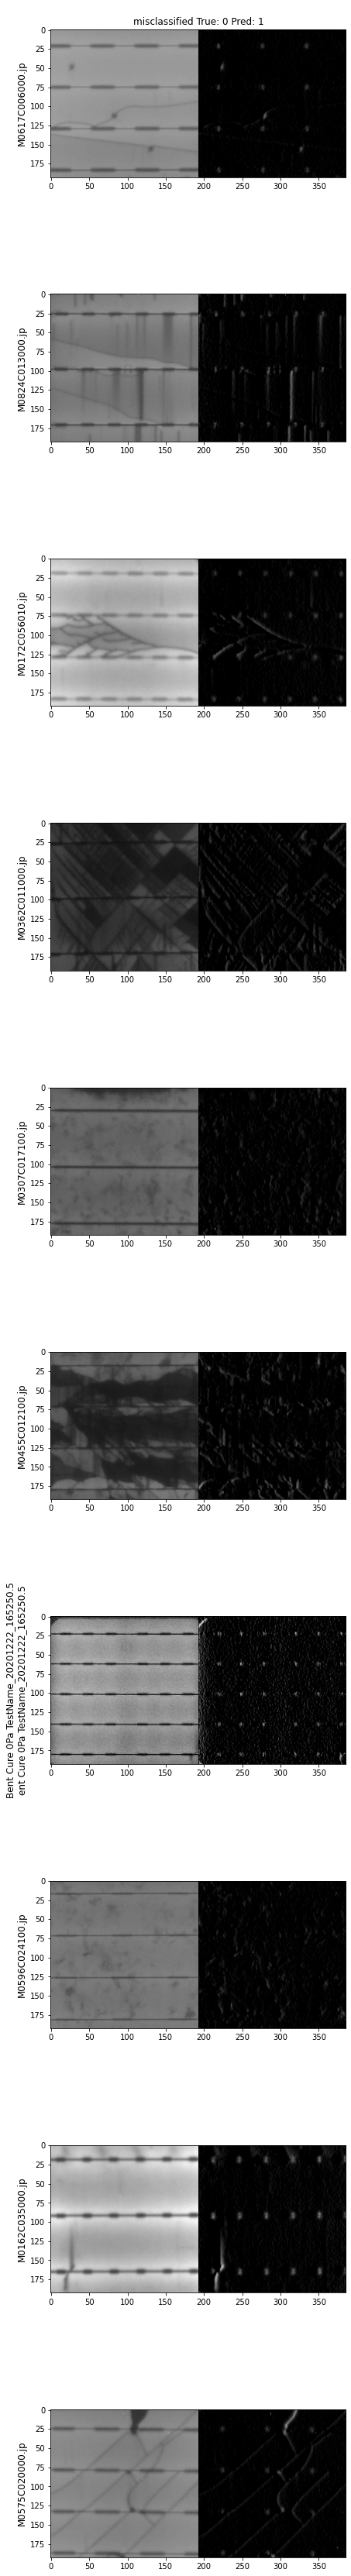

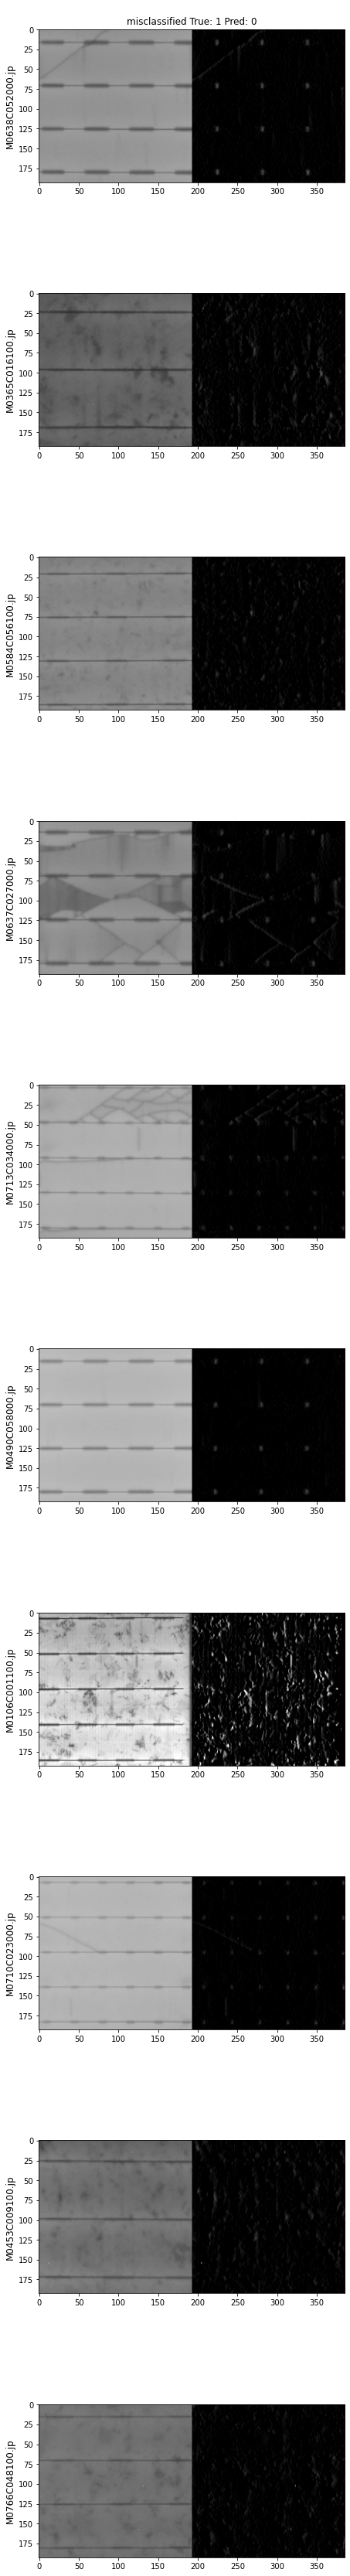

In [11]:
for misclass in out:
    _ = Show(num_images=10, seed=seed) << misclass[-1]

In [12]:
# Now train the final model
params = {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.05, 'pca_dims': pca_dims}
cla = Classifier(defect_, not_defect_, GradientBoostingClassifier, None)
model = cla.fit(**params)

In [13]:
raise KeyError("Ended")

KeyError: 'Ended'